In [300]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [301]:
data= pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [302]:
data =pd.get_dummies(data, columns=['Gender']).drop('CustomerID', axis = 1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [303]:
import matplotlib.pyplot as plt

In [304]:
inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

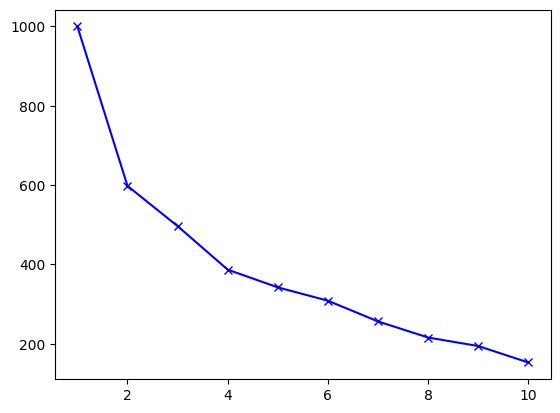

In [305]:
plt.plot(K, inertia, 'bx-')

In [306]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, random_state= 23)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

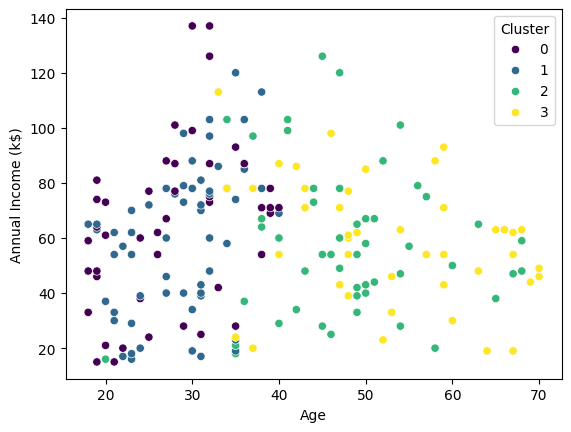

In [307]:
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], hue=data["Cluster"], palette = 'viridis')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

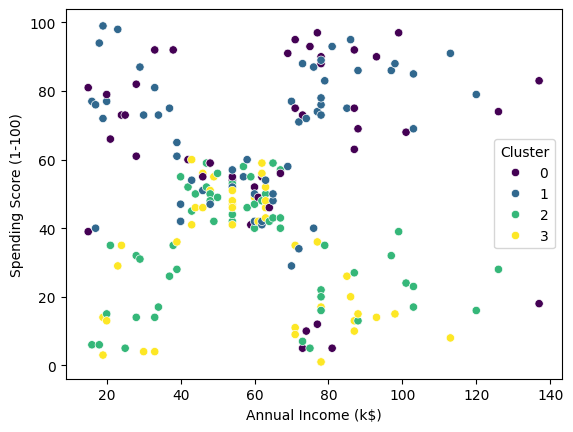

In [308]:
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data["Cluster"], palette = 'viridis')

In [309]:
silhouette_score(data_scaled, kmeans.labels_)

np.float64(0.32958932561000764)